In [1]:
from IPython.display import Image

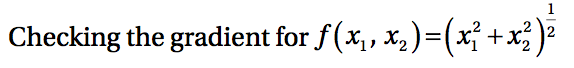

In [3]:
Image(filename='A3.png')

In [6]:
from autograd.util import quick_grad_check
import autograd.numpy as numpy
from autograd import grad

In [5]:
# Define the function
def f(x1,x2): return numpy.sqrt(x1 * x1 + x2 * x2)

In [7]:
# Computes and checks the gradient for the given values

quick_grad_check(f,1.0,extra_args=[2.0])

Checking gradient of <function f at 0x108df6ae8> at 1.0
Gradient projection OK (numeric grad: -0.4472135954092238, analytic grad: -0.4472135954999579)


### Logistic Regression using Autograd

In [8]:
import pylab
import sklearn.datasets
import autograd.numpy as np
from autograd import grad

In [9]:
# Generate the data
train_X,train_y = sklearn.datasets.make_moons(500,noise=0.1)

In [12]:
# Define the activation,prediction and loss function for Logistic Regression
def activation(x):
    return 0.5*(np.tanh(x) + 1)

def predict(weights,inputs):
    return activation(np.dot(inputs,weights))

def loss(weights):
    preds = predict(weights,train_X)
    lable_probabilities = preds * train_y + (1 - preds) * (1 - train_y)
    return -np.sum(np.log(lable_probabilities))

In [13]:
# Compute the gradient of the loss function
gradient_loss = grad(loss)

# Set the initial weights
weights = np.array([1.0,1.0])

# 梯度下降 Steepest Descent
loss_values = []
learning_rate = 0.001
for i in range(100):
    loss_values.append(loss(weights))
    step = gradient_loss(weights)
    weights -= step * learning_rate

In [17]:
# Plot the decision boundary 边界
x_min, x_max = train_X[:, 0].min() - 0.5, train_X[:, 0].max() + 0.5
y_min, y_max = train_X[:, 1].min() - 0.5, train_X[:, 1].max() + 0.5
x_mesh, y_mesh = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = predict(weights, np.c_[x_mesh.ravel(), y_mesh.ravel()])
Z = Z.reshape(x_mesh.shape)
cs = pylab.contourf(x_mesh,y_mesh,Z,cmap=pylab.cm.Spectral)
pylab.scatter(train_X[:,0],train_X[:,1],c=train_y,cmap=pylab.cm.Spectral)
pylab.colorbar(cs)

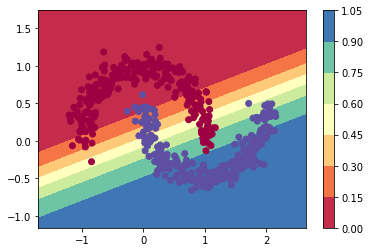

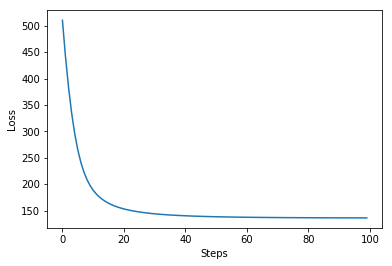

In [18]:
# Plot the loss over each step
pylab.figure()
pylab.plot(loss_values)
pylab.xlabel("Steps")
pylab.ylabel("Loss")
pylab.show()